In [5]:
import ROOT
import particle as pt
import funx as fx
import numpy as np

filett = ROOT.TFile("./datas/TTDilep.root","OPEN")
tttr = filett.trees.events

fileDY = ROOT.TFile("./datas/DYJets.root","OPEN")
dytr = fileDY.trees.events

file = ROOT.TFile("./datas/Data.root","OPEN")
tr = file.trees.events

Il seguente blocco è un errore, non devo girare sul MC ma sui dati

entry 0
entry 100
entry 200
entry 300
entry 400
entry passing 400 npassing= 122
entry 500
entry 600
entry passing 600 npassing= 199
entry 700
entry 800
entry passing 800 npassing= 269
entry 900
entry 1000
entry 1100
entry 1200
entry passing 1200 npassing= 390
entry 1300
entry 1400
entry 1500
entry passing 1500 npassing= 486
entry 1600
entry passing 1600 npassing= 518
entry 1700
entry 1800
entry 1900
entry 2000
entry passing 2000 npassing= 659
entry 2100
entry passing 2100 npassing= 697
entry 2200
entry passing 2200 npassing= 734
entry 2300
entry passing 2300 npassing= 765
entry 2400
entry 2500
entry passing 2500 npassing= 830
entry 2600
entry passing 2600 npassing= 865
entry 2700
entry 2800
entry 2900
entry passing 2900 npassing= 964
entry 3000
entry passing 3000 npassing= 995
entry 3100
entry 3200
entry 3300
entry passing 3300 npassing= 1088
entry 3400
entry 3500
entry 3600
entry passing 3600 npassing= 1191
entry 3700
entry 3800
entry passing 3800 npassing= 1262
entry 3900
entry 4000


Warning in <TFile::Append>: Replacing existing TH1: Jet_e (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Jet_pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: met (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: two_mu_mass (Potential memory leak).


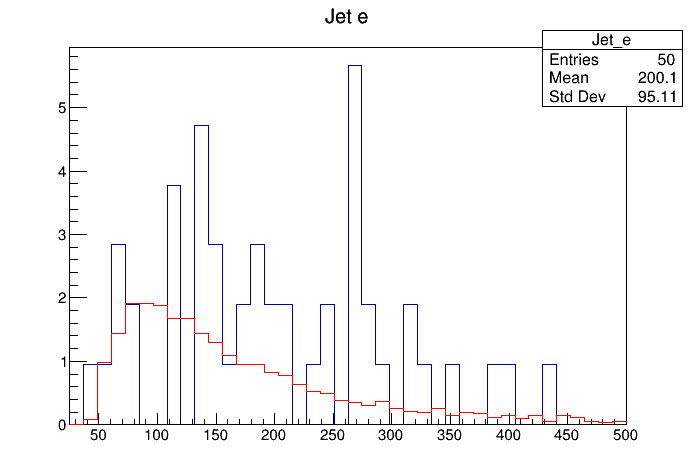

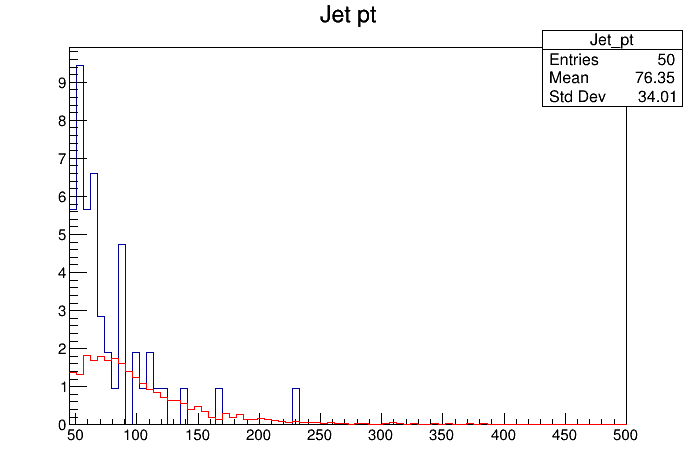

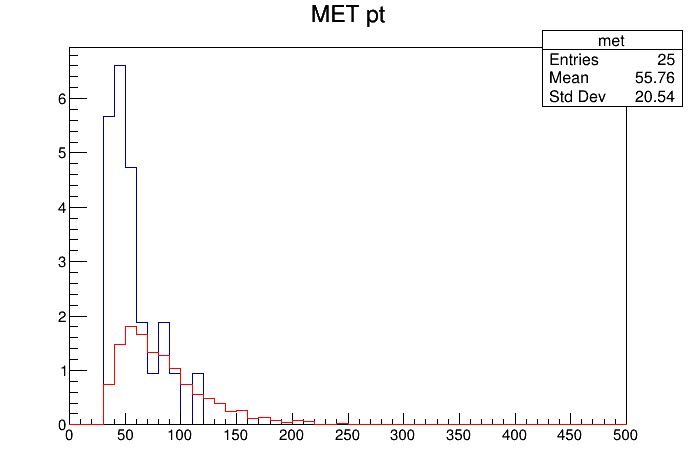

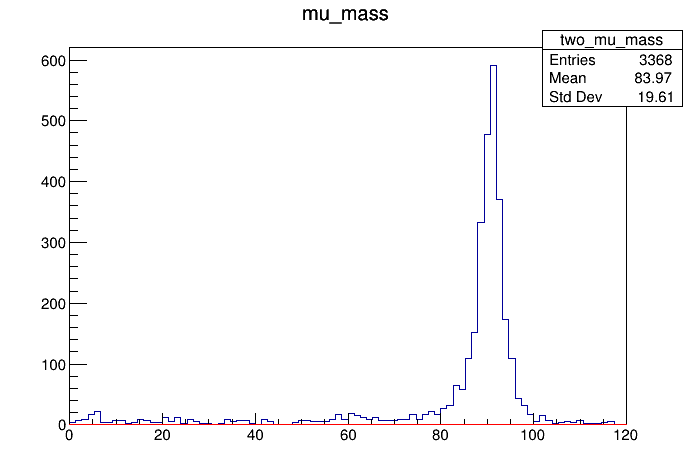

In [6]:
#jets
h_tt_je=ROOT.TH1F("Jet_e", "Jet e", 40, 25 , 500)
h_dy_je=ROOT.TH1F("Jet_e", "Jet e", 40, 25 , 500)
h_tt_jpt=ROOT.TH1F("Jet_pt", "Jet pt", 80, 45 , 500)
h_dy_jpt=ROOT.TH1F("Jet_pt", "Jet pt", 80, 45 , 500)
#met
h_tt_met=ROOT.TH1F("met", "MET pt", 50, 0 , 500)
h_dy_met=ROOT.TH1F("met", "MET pt", 50, 0 , 500)
#muoni
h_m_dy=ROOT.TH1F("two_mu_mass", "mu_mass", 90, 0, 120)
h_m_tt=ROOT.TH1F("two_mu_mass", "mu_mass", 90, 0, 120)

arr = [[h_tt_je,h_dy_je], [h_tt_jpt,h_dy_jpt], [h_tt_met,h_dy_met],[h_m_tt,h_m_dy]]

h_tt_met,h_tt_je,h_tt_jpt,h_m_tt,n_jet_tt,n_met_tt, n_events_tt = fx.cut_make_revert(tttr,h_tt_met,h_tt_je,h_tt_jpt,h_m_tt)
h_dy_met,h_dy_je,h_dy_jpt,h_m_dy,n_jet_dy, n_met_dy, n_events_dy= fx.cut_make_revert(dytr,h_dy_met,h_dy_je,h_dy_jpt,h_m_dy)

#print("n_jets=", n_jet_tt+n_jet_dy)
#print("n_mets=", n_met_tt+n_met_dy)
print("n_events=", n_events_tt+n_events_dy)

w_dy=fx.n4("dy")
w_tt=fx.n4("tt")

print("n_events_norm=", n_events_tt*w_tt + n_events_dy*w_dy)

c=list(np.zeros(4))
h_tts=[]
h_dys=[]
for i in arr:
    h_tts.append(i[0])
    h_dys.append(i[1])
for i in range(4):
    c[i]=ROOT.TCanvas()
    c[i].Draw()
    #h_tts[i].Scale(1/h_tts[i].Integral()) #togliere
    #h_dys[i].Scale(1/h_dys[i].Integral())
    
    h_tts[i].Scale(w_tt)
    h_dys[i].Scale(w_dy)
    
    
    h_tts[i].SetLineColor(ROOT.kRed)
    h_dys[i].Draw("hist")
    h_tts[i].Draw("SAME,hist")

In [7]:
print(n_events_tt*w_tt, n_events_dy*w_dy)

12.571616 23.622


Mi aspetto, a giudicare da questi numeri, di ottenere dunque potenzialmente $11$ muoni che non passano la selezione ma che potrebbero effettivamente essere presi come segnale, dunque $11$ segnali QCD che sono capaci di passare la selezione effettuata. 

---
In particolare di questi solamente $4.72$ sarebbero eventi di fondo. Di questi ne potrebbero passare, poiché credo dibbiamo utilizzare la percentuale di background efficiency trovata nello step 1 del $6\%$, circa $0.28$.

---

Di questi $11\pm 3.4$ muoni potrebbero passarne "per sbaglio" il $6\%$ di $11$ e quindi $0.71 \pm 0.04$

---
* Credo che ciò ci porti a non poter considerare il nostro eccesso di segnale solamente come un fondo male interpretato dall'algoritmo tag & probe
    + E mo?

In [8]:
#jets
h_je=ROOT.TH1F("Jet_e", "Jet e", 40, 25 , 500)
h_jpt=ROOT.TH1F("Jet_pt", "Jet pt", 80, 45 , 500)
#met
h_met=ROOT.TH1F("met", "MET pt", 50, 0 , 500)
#muoni
h_m=ROOT.TH1F("two_mu_mass", "mu_mass", 90, 0, 120)

arr = [h_je,h_jpt,h_met,h_m]

h_met,h_je,h_jpt,h_m,n_jet,n_met, n_events = fx.cut_make_revert(tr,h_met,h_je,h_jpt,h_m)

print("n_jets=", n_jet)
print("n_mets=", n_met)

print("n_events=", n_events, "+/-", np.sqrt(n_events))

#print("n_events=", n_events_tt+n_events_dy)

entry 0
entry passing 0 npassing= 1
entry 100
entry passing 100 npassing= 36
entry 200
entry 300
entry 400
entry passing 400 npassing= 132
entry 500
entry 600
entry 700
entry passing 700 npassing= 240
entry 800
entry 900
entry 1000
entry passing 1000 npassing= 330
entry 1100
entry passing 1100 npassing= 366
entry 1200
entry 1300
entry passing 1300 npassing= 438
entry 1400
entry passing 1400 npassing= 470
entry 1500
entry 1600
entry passing 1600 npassing= 540
entry 1700
entry 1800
entry 1900
entry passing 1900 npassing= 640
entry 2000
entry 2100
entry 2200
entry 2300
entry 2400
entry passing 2400 npassing= 807
entry 2500
entry 2600
entry 2700
entry passing 2700 npassing= 903
entry 2800
entry 2900
entry passing 2900 npassing= 978
entry 3000
entry 3100
entry passing 3100 npassing= 1046
entry 3200
entry 3300
entry 3400
entry 3500
entry 3600
entry 3700
entry 3800
entry 3900
entry 4000
entry passing 4000 npassing= 1363
entry 4100
entry passing 4100 npassing= 1397
entry 4200
entry passing 420

entry 33800
entry 33900
entry 34000
entry passing 34000 npassing= 11575
entry 34100
entry passing 34100 npassing= 11615
entry 34200
entry 34300
entry passing 34300 npassing= 11686
entry 34400
entry passing 34400 npassing= 11722
entry 34500
entry 34600
entry 34700
entry 34800
entry 34900
entry 35000
entry 35100
entry passing 35100 npassing= 11956
entry 35200
entry 35300
entry 35400
entry passing 35400 npassing= 12051
entry 35500
entry 35600
entry 35700
entry 35800
entry passing 35800 npassing= 12182
entry 35900
entry 36000
entry passing 36000 npassing= 12243
entry 36100
entry 36200
entry 36300
entry 36400
entry 36500
entry 36600
entry passing 36600 npassing= 12442
entry 36700
entry 36800
entry passing 36800 npassing= 12505
entry 36900
entry 37000
entry 37100
entry 37200
entry 37300
entry 37400
entry passing 37400 npassing= 12712
entry 37500
entry 37600
entry 37700
entry 37800
entry 37900
entry passing 37900 npassing= 12884
entry 38000
entry passing 38000 npassing= 12928
entry 38100
entr

entry 69500
entry 69600
entry passing 69600 npassing= 23778
entry 69700
entry 69800
entry 69900
entry 70000
entry passing 70000 npassing= 23914
entry 70100
entry passing 70100 npassing= 23945
entry 70200
entry passing 70200 npassing= 23982
entry 70300
entry 70400
entry 70500
entry passing 70500 npassing= 24070
entry 70600
entry 70700
entry 70800
entry 70900
entry 71000
entry 71100
entry 71200
entry passing 71200 npassing= 24298
entry 71300
entry passing 71300 npassing= 24337
entry 71400
entry passing 71400 npassing= 24372
entry 71500
entry 71600
entry passing 71600 npassing= 24450
entry 71700
entry passing 71700 npassing= 24484
entry 71800
entry 71900
entry passing 71900 npassing= 24560
entry 72000
entry 72100
entry 72200
entry 72300
entry 72400
entry passing 72400 npassing= 24725
entry 72500
entry passing 72500 npassing= 24750
entry 72600
entry 72700
entry 72800
entry passing 72800 npassing= 24853
entry 72900
entry passing 72900 npassing= 24888
entry 73000
entry passing 73000 npassing

entry passing 103000 npassing= 35238
entry 103100
entry 103200
entry 103300
entry passing 103300 npassing= 35325
entry 103400
entry 103500
entry 103600
entry 103700
entry passing 103700 npassing= 35472
entry 103800
entry passing 103800 npassing= 35506
entry 103900
entry 104000
entry 104100
entry passing 104100 npassing= 35614
entry 104200
entry 104300
entry 104400
entry passing 104400 npassing= 35715
entry 104500
entry 104600
entry passing 104600 npassing= 35780
entry 104700
entry passing 104700 npassing= 35812
entry 104800
entry 104900
entry 105000
entry 105100
entry 105200
entry 105300
entry 105400
entry 105500
entry passing 105500 npassing= 36089
entry 105600
entry 105700
entry passing 105700 npassing= 36156
entry 105800
entry 105900
entry 106000
entry passing 106000 npassing= 36264
entry 106100
entry 106200
entry passing 106200 npassing= 36330
entry 106300
entry 106400
entry 106500
entry 106600
entry passing 106600 npassing= 36457
entry 106700
entry 106800
entry passing 106800 npas

entry 135200
entry passing 135200 npassing= 46370
entry 135300
entry 135400
entry passing 135400 npassing= 46431
entry 135500
entry 135600
entry 135700
entry 135800
entry passing 135800 npassing= 46568
entry 135900
entry 136000
entry 136100
entry passing 136100 npassing= 46665
entry 136200
entry 136300
entry passing 136300 npassing= 46725
entry 136400
entry 136500
entry passing 136500 npassing= 46786
entry 136600
entry 136700
entry 136800
entry 136900
entry passing 136900 npassing= 46920
entry 137000
entry 137100
entry 137200
entry 137300
entry 137400
entry 137500
entry 137600
entry passing 137600 npassing= 47168
entry 137700
entry passing 137700 npassing= 47205
entry 137800
entry 137900
entry passing 137900 npassing= 47288
entry 138000
entry 138100
entry 138200
entry 138300
entry 138400
entry 138500
entry passing 138500 npassing= 47492
entry 138600
entry passing 138600 npassing= 47521
entry 138700
entry 138800
entry passing 138800 npassing= 47586
entry 138900
entry 139000
entry 139100

entry 165800
entry 165900
entry 166000
entry 166100
entry 166200
entry passing 166200 npassing= 56931
entry 166300
entry 166400
entry passing 166400 npassing= 57005
entry 166500
entry passing 166500 npassing= 57043
entry 166600
entry passing 166600 npassing= 57074
entry 166700
entry 166800
entry 166900
entry 167000
entry 167100
entry passing 167100 npassing= 57242
entry 167200
entry passing 167200 npassing= 57281
entry 167300
entry 167400
entry 167500
entry passing 167500 npassing= 57393
entry 167600
entry 167700
entry passing 167700 npassing= 57469
entry 167800
entry 167900
entry passing 167900 npassing= 57531
entry 168000
entry passing 168000 npassing= 57564
entry 168100
entry 168200
entry passing 168200 npassing= 57629
entry 168300
entry 168400
entry 168500
entry passing 168500 npassing= 57719
entry 168600
entry 168700
entry 168800
entry passing 168800 npassing= 57820
entry 168900
entry 169000
entry passing 169000 npassing= 57895
entry 169100
entry 169200
entry passing 169200 npassi

entry 196900
entry passing 196900 npassing= 67521
entry 197000
entry 197100
entry 197200
entry passing 197200 npassing= 67623
entry 197300
entry 197400
entry 197500
entry 197600
entry 197700
entry 197800
entry passing 197800 npassing= 67831
entry 197900
entry passing 197900 npassing= 67867
entry 198000
entry 198100
entry 198200
entry 198300
entry 198400
entry 198500
entry passing 198500 npassing= 68065
entry 198600
entry 198700
entry 198800
entry 198900
entry passing 198900 npassing= 68213
entry 199000
entry 199100
entry 199200
entry passing 199200 npassing= 68338
entry 199300
entry 199400
entry passing 199400 npassing= 68405
entry 199500
entry 199600
entry 199700
entry 199800
entry passing 199800 npassing= 68538
entry 199900
entry passing 199900 npassing= 68578
entry 200000
entry 200100
entry 200200
entry 200300
entry passing 200300 npassing= 68723
entry 200400
entry passing 200400 npassing= 68754
entry 200500
entry passing 200500 npassing= 68784
entry 200600
entry passing 200600 npas

entry 227900
entry 228000
entry 228100
entry 228200
entry 228300
entry passing 228300 npassing= 78272
entry 228400
entry 228500
entry 228600
entry passing 228600 npassing= 78386
entry 228700
entry 228800
entry 228900
entry 229000
entry passing 229000 npassing= 78530
entry 229100
entry 229200
entry passing 229200 npassing= 78592
entry 229300
entry 229400
entry 229500
entry passing 229500 npassing= 78699
entry 229600
entry passing 229600 npassing= 78731
entry 229700
entry 229800
entry passing 229800 npassing= 78807
entry 229900
entry passing 229900 npassing= 78842
entry 230000
entry passing 230000 npassing= 78870
entry 230100
entry 230200
entry passing 230200 npassing= 78937
entry 230300
entry 230400
entry passing 230400 npassing= 79007
entry 230500
entry 230600
entry 230700
entry 230800
entry 230900
entry passing 230900 npassing= 79182
entry 231000
entry 231100
entry passing 231100 npassing= 79256
entry 231200
entry passing 231200 npassing= 79294
entry 231300
entry 231400
entry 231500
e

entry passing 260300 npassing= 89363
entry 260400
entry 260500
entry 260600
entry 260700
entry passing 260700 npassing= 89508
entry 260800
entry passing 260800 npassing= 89546
entry 260900
entry 261000
entry 261100
entry passing 261100 npassing= 89666
entry 261200
entry 261300
entry 261400
entry 261500
entry 261600
entry passing 261600 npassing= 89840
entry 261700
entry 261800
entry 261900
entry 262000
entry 262100
entry 262200
entry passing 262200 npassing= 90049
entry 262300
entry 262400
entry 262500
entry 262600
entry 262700
entry 262800
entry 262900
entry 263000
entry passing 263000 npassing= 90213
entry 263100
entry 263200
entry passing 263200 npassing= 90230
entry 263300
entry 263400
entry 263500
entry 263600
entry 263700
entry 263800
entry 263900
entry 264000
entry passing 264000 npassing= 90304
entry 264100
entry 264200
entry 264300
entry 264400
entry passing 264400 npassing= 90339
entry 264500
entry 264600
entry 264700
entry 264800
entry 264900
entry 265000
entry passing 26500

Warning in <TFile::Append>: Replacing existing TH1: Jet_e (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Jet_pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: met (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: two_mu_mass (Potential memory leak).


In [9]:
2.5/1000*3162

7.905

In [11]:
2.2+2.8+7.9

12.9

In [12]:
13

13